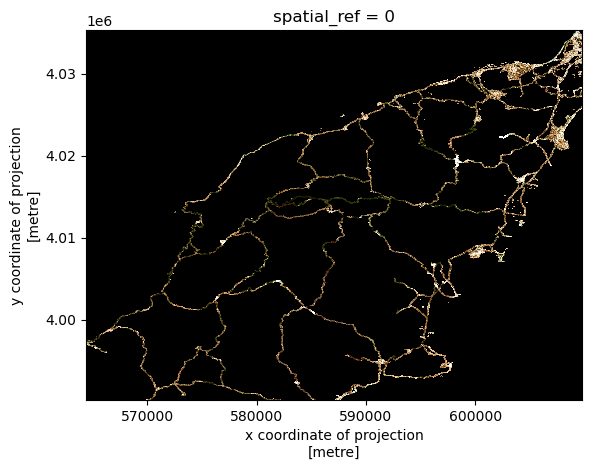

In [9]:
import pystac
import rioxarray
import geopandas as gpd


items = pystac.ItemCollection.from_file("data/rhodes_sentinel-2.json")
item = items[0]

rhodes_visual_href = item.assets["visual"].href  # true color image

path_visual = 'data/sentinel2/visual.tif'
visual = rioxarray.open_rasterio(path_visual, overview_level=1)
# visual

assets = gpd.read_file('data/assets.gpkg')

# visual.plot.imshow()
# assets.total_bounds // Gives Bounding Box [minx, miny, maxx, maxy]

# Reproject
assets = assets.to_crs(visual.rio.crs)

# Check the new bounding box
#assets.total_bounds // Bounds More accurate Now, same format

# Crop the raster with the bounding box
# (*) unpacks total_bounds since it is a np array
visual_clipbox = visual.rio.clip_box(*assets.total_bounds) #Takes in 4 args, in same order as total bounds

# Visualize the cropped image
# visual_clipbox.plot.imshow()

# Crop the raster with the polygon
visual_clip = visual_clipbox.rio.clip(assets["geometry"])

# Visualize the cropped image
# visual_clip.plot.imshow()



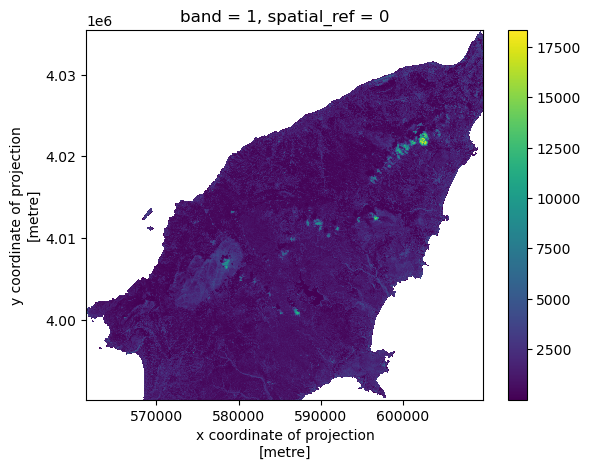

In [10]:
#Exercise 1
gdf_greece = gpd.read_file('./data/gadm/ADM_ADM_3.gpkg')
gdf_rhodes = gdf_greece[gdf_greece['NAME_3']=='Rhodos']
path_red = './data/sentinel2/red.tif'
red = rioxarray.open_rasterio(path_red, overview_level=1)
gdf_rhodes = gdf_rhodes.to_crs(red.rio.crs)
red_clip = red.rio.clip(gdf_rhodes["geometry"])
red_clip_nan = red_clip.where(red_clip!=red_clip.rio.nodata)
red_clip_nan.plot()


In [15]:
dem = rioxarray.open_rasterio('./data/dem/rhodes_dem.tif')
# dem.plot()
# print(dem.rio.crs)
# print(visual_clip.rio.crs)

dem_matched = dem.rio.reproject_match(visual_clip)
# dem_matched.plot()
dem_matched.rio.to_raster('dem_rhodes_match.tif', driver='COG')